In [36]:
% add parent dir to path (gives access to utils)
addpath(genpath('..'))

In [37]:
n_sources = 5;
n_measurements = 3;
len = 30;
noise = 20;

[data, sources, source_coords, measurement_coords] = make_data(n_sources, len, noise, n_measurements);

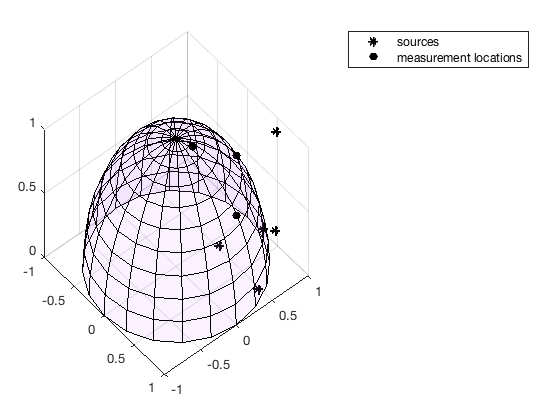

In [40]:
[ah] = visualize_signals(source_coords, measurement_coords);
azimuth = 50;
elevation = 50;
view(ah, [azimuth,elevation]) % rotate this with different az.+ el.

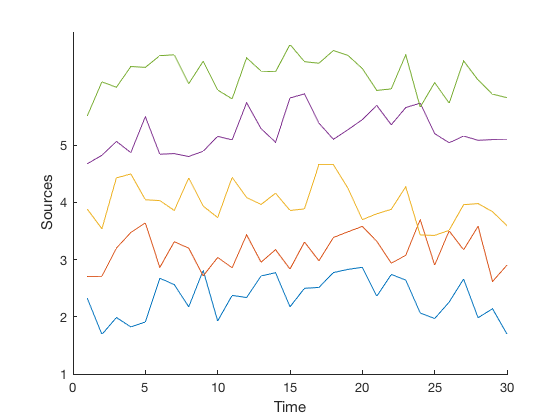

In [4]:
figure();
hold on;

for source = 1:n_sources
    source_timeseries = sources(source, :);
    plot(1:len, source_timeseries + source*noise);
end

xlabel('Time');
ylabel('Sources');
yticks(linspace(noise,noise*n_sources,n_sources));
yticklabels(1:n_sources);

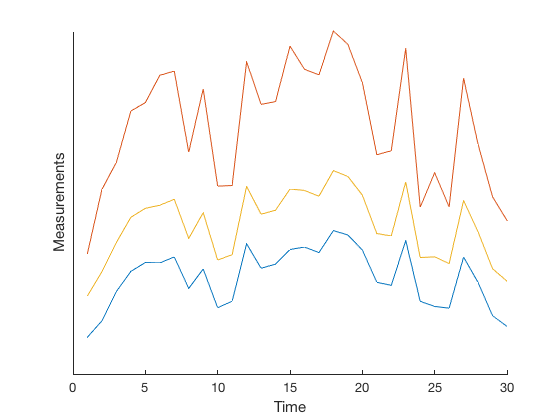

In [5]:
figure();
hold on;

for measurement = 1:n_measurements
    measurement_timeseries = data(measurement, :);
    plot(1:len, measurement_timeseries + measurement*noise);
end

xlabel('Time');
ylabel('Measurements');
yticks(linspace(noise,noise*n_measurements,n_measurements));
yticklabels(1:n_measurements);

# ICA starts here!

In [6]:
x = data;
[d, n] = size(x);

# ICA - It's all about building W
Remember from **SVD**:  $\mathbf{X = U \Sigma V^T}$.
This is useful because we want to get $\mathbf{x = As}$ to $\mathbf{\hat{s} = W x}$.

$\mathbf{W = A^{-1}}$ and $\mathbf{\hat{s} \approx s}$

Thanks to **SVD** taking the inverse of A is as simple as taking the transpose of $\mathbf{U \Sigma V^T}$ (aka. $\mathbf{(U \Sigma V^T)^T}$) as long as we assume the $\mathbf{s}$ (sources) are whitened, which means that the sources are decorellated:
$$\mathbf{\langle ss^T \rangle = cov(s) = C_s} =
          \left[ {\begin{array}{cccc}
           1 & 0 & 0 \\
           0 & 1 & 0 \\
           0 & 0 & 1 \\
\end{array} } \right] $$

This makes $\mathbf{W = (U \Sigma V^T)^T = V \Sigma^{-1} U^T}$. 

<img src="img/Shlens_says_it_best.png">

*from [Shlens, 2014](https://arxiv.org/abs/1404.2986)*

Remember 

$$\mathbf{\Sigma} =
          \left[ {\begin{array}{cccc}
           \sqrt{\lambda_1} & 0 & 0 \\
           0 & \sqrt{\lambda_2} & 0 \\
           0 & 0 & \sqrt{\lambda_3} \\
\end{array} } \right] = 
           \left[ {\begin{array}{cccc}
           var_{1,1} & 0 & 0 \\
           0 & var_{2,2} & 0 \\
           0 & 0 & var_{3,3} \\
\end{array} } \right] $$

so...

to get from $\mathbf{\Sigma^2 = D => \Sigma}$ we must $\mathbf{D^{-1/2}}$ now we have arrived at

$$\mathbf{W = VD^{-1/2}E^T}$$

$\mathbf{D^{-1/2}}$ and $\mathbf{E^T}$ perform an operation called whitening.

Whitening decorelats (in other words makes covariance matrix 1s on the diagonal and zeros everywhere else) and then normalizes (shrinks the variance along each dimention so that they all are the same)

With that blurb in mind take a look at this figure:

<img src="/img/Shlens_whitening.png">

*from [Shlens, 2014](https://arxiv.org/abs/1404.2986)*


        

In [42]:
% mean subtraction
x = x - repmat(mean(x,2), 1, n);


Error using eval
Undefined function or variable 'x'.



In [8]:
[E, D] = eig(cov(x'));

In [9]:
x_w = sqrtm(pinv(D))*E'*x;

In [10]:
[V,s,u] = svd((repmat(sum(x_w.*x_w,1),d,1).*x_w)*x_w');

In [11]:
W = V * sqrtm(pinv(D)) * E';

In [12]:
S = W * x;

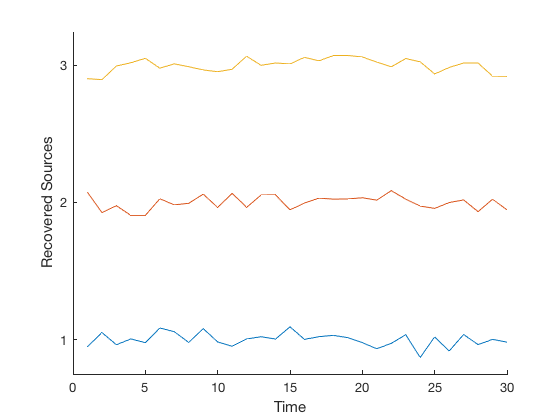

In [16]:
figure();
hold on;

for measurement = 1:n_measurements
    measurement_timeseries = S(measurement, :);
    plot(1:len, measurement_timeseries + measurement*noise);
end

xlabel('Time');
ylabel('Recovered Sources');
yticks(linspace(noise,noise*n_measurements,n_measurements));
yticklabels(1:n_measurements);